In [1]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.io import loadmat
from scipy.interpolate import griddata
from netCDF4 import Dataset as dataset
import time

In [2]:
df = pd.read_csv("cleaned_data.csv")

Text(0, 0.5, 'Latitude [°]')

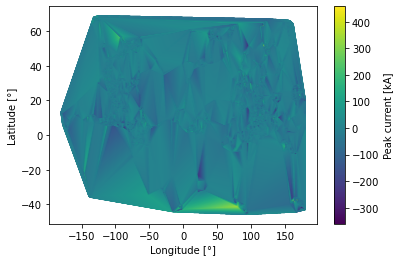

In [3]:
Long = df.lon
Lat = df.lat
peak_current = df["Peak Current[kA]"]
pts=1000;

[x,y]=np.meshgrid(np.linspace(Long.min(),Long.max(),pts),np.linspace(np.min(Lat),np.max(Lat),pts));
z = griddata((Long, Lat), peak_current, (x, y), method='linear');
x = np.matrix.flatten(x); #Gridded longitude
y = np.matrix.flatten(y); #Gridded latitude
z = np.matrix.flatten(z); #Gridded elevation

plt.scatter(x,y,1,z)
plt.colorbar(label='Peak current [kA]')
plt.xlabel('Longitude [°]')
plt.ylabel('Latitude [°]')

In [4]:
nc = dataset('ECMWF_temp2m.nc') #https://medium.com/@yonas.mersha14/mapping-geographical-data-with-basemap-python-package-beaa1ed87e0a

In [5]:
lat = nc.variables['latitude'][:]
lon = nc.variables['longitude'][:]
time = nc.variables['time'][:]
t2 = nc.variables['p2t'][:]

In [6]:
lon = df.lon
lat = df.lat

In [ ]:
fig = plt.figure(num=None, figsize=(7, 7) ) 
m = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,llcrnrlon=-180,urcrnrlon=180,resolution='c')#m = Basemap(projection='moll',lon_0=0,resolution='c')

#x, y = m(*np.meshgrid(lon,lat))
#data = np.squeeze(t2[4,:,:])
#cs = m.contourf(x, y, data, levels = 100, cmap=plt.cm.jet)

m.drawcoastlines()
m.drawmapboundary()
m.drawcountries(linewidth=1, linestyle='solid', color='k' ) 
m.drawmeridians(range(33, 48, 2), color='k', linewidth=1.0, dashes=[4, 4], labels=[0, 0, 0, 1])
m.drawparallels(range(3, 15, 2), color='k', linewidth=1.0, dashes=[4, 4], labels=[1, 0, 0, 0])

plt.ylabel("Latitude", fontsize=15, labelpad=35)
plt.xlabel("Longitude", fontsize=15, labelpad=20)
cbar = m.colorbar(cs, location='right', pad="3%")
cbar.set_label('Temperature (K)', fontsize=13)
plt.title('2-meter temperature filled contour map', fontsize=15)
plt.show();

In [36]:
# start_time = time.time()

# con = loadmat('GLD20180709cleaned.mat').get('flashes')
# mat1 = loadmat('GLD20180709cleaned.mat').get('flashes')

# for i in range(5):
#     con = np.vstack((con, mat1))

# np.save('test',con)

# end_time = time.time()
# print(end_time-start_time)

In [2]:
allfilepaths = np.load("./2dHistogramData/filePathsBySeason.npy", allow_pickle = True)
allFilePaths = allfilepaths.item()

In [ ]:
start_time = time.time()

for season, filepaths in allFilePaths.items():
    data = loadmat(allFilePaths[season][0]).get('flashes') # vstack cannot take empty ndarray

    for filepath in filepaths[1:]:
        data_next = loadmat(filepath).get('flashes')
        data = np.vstack((data, data_next))
    
    pathName = "./2DHistogramData/" + season + "ArrayData"
    np.save(pathName, data)
    
end_time = time.time()
print(end_time-start_time)